<a href="https://colab.research.google.com/github/nikhilmuser/nikhilmuser/blob/main/custom_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


In [2]:
!curl -s ipv4.icanhazip.com

34.136.94.114


In [3]:
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image
import os

In [6]:
import cv2
import os
import random
import collections
from collections import defaultdict

from shutil import copy
from shutil import copytree, rmtree

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img

In [7]:
print(tf.__version__)
print(tf.test.gpu_device_name())

2.13.0



In [8]:
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    tf.keras.utils.get_file(
    'food-101.tar.gz',
    'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz',
    cache_subdir='/content',
    extract=True,
    archive_format='tar',
    cache_dir=None
    )
    print("Dataset downloaded and extracted!")

In [9]:
get_data_extract()

4996278331/4996278331 [==============================] - 196s 0us/step
Dataset downloaded and extracted!


In [10]:
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [11]:
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [12]:
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [13]:
train_files = sum([len(files) for i, j, files in os.walk("food-101/train")])
print("Total number of samples in train folder")
print(train_files)

Total number of samples in train folder
75750


In [14]:
test_files = sum([len(files) for i, j, files in os.walk("food-101/test")])
print("Total number of samples in test folder")
print(test_files)

Total number of samples in test folder
25250


In [15]:
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [16]:
food_list = ['samosa','pizza','omelette']
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [17]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette


In [18]:
print("Total number of samples in train folder")
train_files = sum([len(files) for i, j, files in os.walk("food-101/train_mini")])
print(train_files)

Total number of samples in train folder
2250


In [19]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette


In [20]:
print("Total number of samples in test folder")
test_files = sum([len(files) for i, j, files in os.walk("food-101/test_mini")])
print(test_files)

Total number of samples in test folder
750


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
path_to_train_data = '/content/food-101/train_mini'  # Update this
path_to_valid_data = '/content/food-101/test_mini'  # Update this


In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Define the model
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))  # Assuming 3 classes in your dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    path_to_train_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    path_to_valid_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

# Train the custom model on your dataset
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

# Save the trained model
model.save('custom_model.h5')


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/10
141/141 [==============================] - 218s 2s/step - loss: 1.2592 - accuracy: 0.3551 - val_loss: 1.0367 - val_accuracy: 0.4373
Epoch 2/10
141/141 [==============================] - 215s 2s/step - loss: 0.9951 - accuracy: 0.4782 - val_loss: 0.9050 - val_accuracy: 0.6013
Epoch 3/10
141/141 [==============================] - 215s 2s/step - loss: 0.9253 - accuracy: 0.5298 - val_loss: 0.8182 - val_accuracy: 0.6080
Epoch 4/10
141/141 [==============================] - 230s 2s/step - loss: 0.8954 - accuracy: 0.5658 - val_loss: 0.7980 - val_accuracy: 0.6107
Epoch 5/10
141/141 [==============================] - 243s 2s/step - loss: 0.8499 - accuracy: 0.5867 - val_loss: 0.8052 - val_accuracy: 0.6653
Epoch 6/10
141/141 [==============================] - 212s 2s/step - loss: 0.7964 - accuracy: 0.6404 - val_loss: 0.7105 - val_accuracy: 0.6707
Epoch 7/10
141/141 [==============================] - 209s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
!pip install gTTS

In [54]:
%%writefile app.py
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
from gtts import gTTS

def import_and_predict(image_data, model):
    size = (224, 224)
    image = ImageOps.fit(image_data, size, method=Image.LANCZOS)
    image = image.convert('RGB')
    image = np.asarray(image)
    image = (image.astype(np.float32) / 255.0)
    img_reshape = image[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction

model = tf.keras.models.load_model('custom_model.h5')

st.write("""
         # Food Item Prediction
         """
         )

st.write("This is a simple image classification web app to predict food item names")

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

if file is None:
    st.text("You haven't uploaded an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)

    food_classes = ['samosa','pizza','omelette']

    # Display the prediction
    food_class = food_classes[np.argmax(prediction)]
    st.write(f"It is a {food_class}!")

    # Text-to-speech
    text_to_speech = f"It is a {food_class}!"
    tts = gTTS(text=text_to_speech, lang='en')
    tts.save("output.mp3")

    # Play audio
    st.audio("output.mp3", format="audio/mp3", start_time=0)


Overwriting app.py


In [42]:
!pip install streamlit -q

In [43]:
!curl -s ipv4.icanhazip.com

34.136.94.114


In [59]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] - fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.136.94.114:8501

npx: installed 22 in 2.843s
your url is: https://legal-steaks-sink.loca.lt
2023-10-15 19:36:12.432449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 0s 154ms/step
  Stopping...
^C


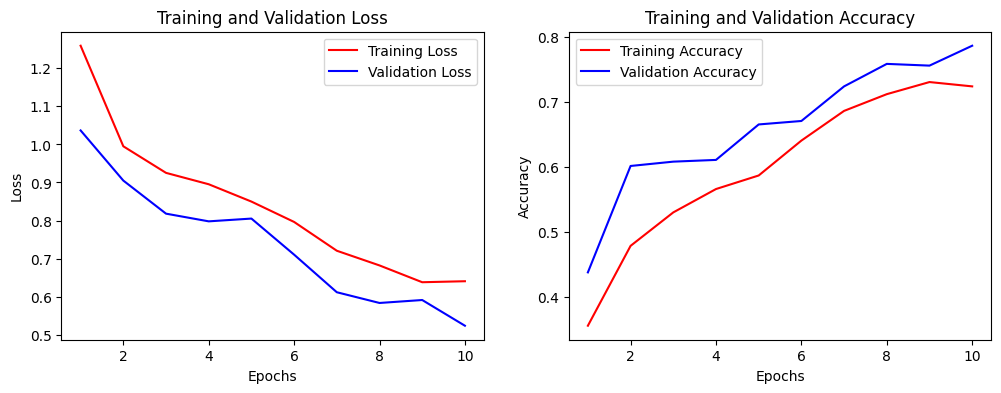

In [58]:
import matplotlib.pyplot as plt

# Get the training history
training_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']
training_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'r', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
